In [1]:
import matplotlib.pyplot as plt
import pprint
from bs4 import BeautifulSoup, Comment
import requests
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import re
import json
import time

In [3]:
passing_games_list = []
for i in range(0, 1400, 100):
    url = '''https://www.pro-football-reference.com/play-index/tgl_finder.cgi?request=1&match=game&year_min=2015&year_max=2019&game_type=E&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&temperature_gtlt=lt&game_location=H&c1stat=pass_yds_combined&c1comp=gte&c5val=1.0&order_by=pass_yds&offset={}'''
    
    passing_games_list.append(pd.read_html(url.format(i), skiprows=0, header=1)[0])


In [4]:
game_stats = pd.concat(passing_games_list)

In [5]:
game_stats.shape

(1383, 29)

In [6]:
game_stats.drop(game_stats[game_stats['Tm'] == 'Tm'].index, inplace=True)

In [7]:
game_stats = game_stats.reset_index()

In [8]:
gs1 = game_stats.replace(to_replace='STL', value='LAR')
passing_stats = gs1.replace(to_replace='LAC', value='SDG')
passing_stats

,index,Rk,Tm,Year,Date,Time,LTime,Unnamed: 6,Opp,Week,...,Sk,Yds.1,Rate,Cmp.1,Att.1,Yds.2,TD.1,Int.1,Sk.1,Yds.3
0,0,1,NOR,2015,2015-11-01,1:02,12:02,NaN,NYG,8,...,0,0,131.7,69,91,834,13,2,3,21
1,1,2,LAR,2019,2019-09-29,4:05,1:05,NaN,TAM,4,...,2,27,78.7,73,109,866,6,4,4,36
2,2,3,PIT,2017,2017-12-10,8:30,8:30,NaN,BAL,14,...,3,20,98.4,64,101,747,4,1,4,28
3,3,4,ATL,2016,2016-10-02,1:04,1:04,NaN,CAR,4,...,3,22,142.0,59,85,810,7,3,4,30
4,4,5,TAM,2019,2019-12-08,1:00,1:00,NaN,IND,14,...,1,7,103.0,54,85,710,6,3,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,26,1326,HOU,2017,2017-12-25,4:30,3:30,NaN,PIT,16,...,7,42,48.9,28,47,277,3,1,7,42
1326,27,1327,TEN,2018,2018-10-14,4:25,3:25,NaN,BAL,6,...,11,66,71.8,35,52,289,1,1,11,66
1327,28,1328,WAS,2019,2019-10-20,1:00,1:00,NaN,SFO,7,...,3,27,81.9,21,33,196,0,1,5,32
1328,29,1329,LAR,2019,2019-10-13,4:05,1:05,NaN,SFO,6,...,4,30,59.7,37,57,280,0,1,6,41


In [9]:
nfl_dictionary = {'Arizona Cardinals':'ARI', 'Atlanta Falcons':	'ATL', 'Baltimore Ravens': 'BAL',
                'Buffalo Bills':'BUF', 'Carolina Panthers':	'CAR', 'Chicago Bears':	'CHI',
                'Cincinnati Bengals':'CIN', 'Cleveland Browns':	'CLE', 'Dallas Cowboys':'DAL',
                'Denver Broncos': 'DEN', 'Detroit Lions':'DET', 'Green Bay Packers':'GNB', 'Houston Texans':'HOU',
                'Indianapolis Colts':'IND', 'Jacksonville Jaguars':'JAX', 'Kansas City Chiefs':'KAN', 
                'Miami Dolphins':'MIA', 'Minnesota Vikings':'MIN', 'New England Patriots':'NWE', 'New Orleans Saints':'NOR',
                'New York Giants':'NYG', 'New York Jets':'NYJ','Oakland Raiders':'OAK', 'Philadelphia Eagles':'PHI',
                'Pittsburgh Steelers':'PIT', 'Los Angeles Chargers':'SDG', 'San Francisco 49ers':'SFO',
                'Seattle Seahawks':'SEA', 'Los Angeles Rams':'LAR', 'Tampa Bay Buccaneers':'TAM',
                'Tennessee Titans':'TEN', 'Washington Redskins':'WAS'}

In [ ]:
def web_scrape(url, filename):
    data = requests.get(url)
    soup = BeautifulSoup(data.text, features="lxml")
    team_data = soup.findAll(class_= 'span3 wbkg')

    table_set = set()
    for i in range(len(team_data)):
        
        date = soup.findAll('div', {'class':'gt-header'})[i].text.strip().split('\n')[0]
        away_team = soup.findAll('div', {'class':'gt-away'})[i].text.strip().split('\n')[0]
        home_team = soup.findAll('div', {'class':'gt-home'})[i].text.strip().split('\n')[0]
        weather = soup.findAll('div', {'class':'gt-weather'})[i].text.strip().split('f')[0]
        if weather == 'DOME':
            weather_temp = np.NaN
            weather_type = 'DOME'
        else:
            weather_temp = np.int(weather) if '/' not in weather else np.NaN
            weather_type = soup.findAll('div', {'class':'gt-weather'})[i].text.strip().split('f')[1]
        game_row = (date, away_team, home_team, weather_temp, weather_type)
        table_set.add(game_row)
    table_list = list(table_set)
    df = pd.DataFrame(table_list, columns = ('Date', 'Away_Team', 'Home_Team', 'Weather_Temp', 'Weather_Type'))
    df.to_csv(filename)
    return None

web_scrape('http://www.nflweather.com/en/searches/104020', '2017_nfl_weather.csv')

In [10]:
df2019_weather = pd.read_csv('2019_nfl_weather.csv')
df2018_weather = pd.read_csv('2018_nfl_weather.csv')
df2017_weather = pd.read_csv('2017_nfl_weather.csv')
df2016_weather = pd.read_csv('2016_nfl_weather.csv')
df2015_weather = pd.read_csv('2015_nfl_weather.csv')
frames = [df2019_weather, df2018_weather, df2017_weather, df2016_weather, df2015_weather]
result = pd.concat(frames)

In [11]:
# this allows me to match date time formatting between the two dataframes
from datetime import datetime
result['Date'] = result['Date'].apply(lambda x : 
                datetime.strptime(x,'%a %m/%d/%y %I:%M %p').strftime("%Y-%m-%d"))

In [12]:
result = result.reset_index()

In [13]:
#wrong shape, it includes preseason games
result.shape

(1662, 7)

In [14]:
# match team names with team codes on the passing stats dataframe
result1 = result.replace({'Away_Team':nfl_dictionary})
weather_results = result1.replace({'Home_Team':nfl_dictionary})

In [15]:
game_stats = game_stats.rename(columns={'Tm': 'Home_Team', 'Opp': 'Away_Team'})

In [16]:
merged = game_stats.merge(weather_results, 
                          on=['Home_Team', 'Date', 'Away_Team'], how='left')
merged

,index_x,Rk,Home_Team,Year,Date,Time,LTime,Unnamed: 6,Away_Team,Week,...,Att.1,Yds.2,TD.1,Int.1,Sk.1,Yds.3,index_y,Unnamed: 0,Weather_Temp,Weather_Type
0,0,1,NOR,2015,2015-11-01,1:02,12:02,NaN,NYG,8,...,91,834,13,2,3,21,275.0,275.0,NaN,DOME
1,1,2,LAR,2019,2019-09-29,4:05,1:05,NaN,TAM,4,...,109,866,6,4,4,36,193.0,193.0,70.0,Partly Cloudy
2,2,3,PIT,2017,2017-12-10,8:30,8:30,NaN,BAL,14,...,101,747,4,1,4,28,282.0,282.0,30.0,Mostly Cloudy
3,3,4,ATL,2016,2016-10-02,1:04,1:04,NaN,CAR,4,...,85,810,7,3,4,30,130.0,130.0,NaN,DOME
4,4,5,TAM,2019,2019-12-08,1:00,1:00,NaN,IND,14,...,85,710,6,3,2,15,306.0,306.0,76.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,26,1326,HOU,2017,2017-12-25,4:30,3:30,NaN,PIT,16,...,47,277,3,1,7,42,206.0,206.0,51.0,Mostly Cloudy
1326,27,1327,TEN,2018,2018-10-14,4:25,3:25,NaN,BAL,6,...,52,289,1,1,11,66,108.0,108.0,66.0,Overcast
1327,28,1328,WAS,2019,2019-10-20,1:00,1:00,NaN,SFO,7,...,33,196,0,1,5,32,147.0,147.0,55.0,Light Rain
1328,29,1329,LAR,2019,2019-10-13,4:05,1:05,NaN,SFO,6,...,57,280,0,1,6,41,154.0,154.0,72.0,Clear


In [17]:
merged = merged.drop(columns=['LTime', 'Unnamed: 6', 'index_y', 'Unnamed: 0'])

In [18]:
merged = merged.rename(columns={'Yds.2': 'Total_Passing_Yards', 
                                'Yds': 'home_passing_yards'})

In [19]:
# convert strings to integers
# add a column for the away team
merged['Total_Passing_Yards'] = merged['Total_Passing_Yards'].apply(lambda x: int(x))
merged['home_passing_yards'] = merged['home_passing_yards'].apply(lambda x: int(x))
merged['Away_passing_yards'] = merged['Total_Passing_Yards'] - merged['home_passing_yards']

In [20]:
x = merged['Weather_Type'].unique()
x

array(['DOME', ' Partly Cloudy', ' Mostly Cloudy', ' Clear', ' Overcast',
       nan, ' Drizzle', ' Humid and Partly Cloudy',
       ' Humid and Mostly Cloudy', ' Dry and Partly Cloudy',
       ' Light Snow', ' Rain', ' Foggy', ' Light Rain',
       ' Possible Light Rain', ' Possible Drizzle', ' Heavy Rain',
       ' Light Sleet', ' Humid', ' Breezy and Humid', ' Snow',
       ' Humid and Overcast', ' Windy and Partly Cloudy', ' Flurries'],
      dtype=object)

In [21]:
#srip leading white space
merged['Weather_Type'] = merged['Weather_Type'].str.strip()

In [22]:
weather_conditions = {'Clear':'good weather', 'DOME':'Dome', 'Mostly Cloudy': 'good weather', 'Partly Cloudy':'good weather', 
                        'Overcast': 'good weather', 'Drizzle':'bad weather', 'Light Rain': 'bad weather', 'Rain': 'bad weather', 'Light Snow':'bad weather' , 
                        'Foggy':'good weather', 'Possible Drizzle':'good weather', 'Humid and Mostly Cloudy': 'good weather', 'Humid and Partly Cloudy':'good weather',
                        'Snow':'bad weather', 'Heavy Rain':'bad weather', 'Flurries':'bad weather', 'Light Sleet':'bad weather', 'Humid':'good weather',
                        'Windy and Partly Cloudy':'bad weather', 'Breezy and Humid':'good weather', 'Possible Light Rain': 'good weather', 'Dry and Partly Cloudy':'good weather',
                        'Humid and Overcast':'good weather', 'unknown':'unknown'}
set(weather_conditions.values())

{'Dome', 'bad weather', 'good weather', 'unknown'}

In [23]:
merged = merged.fillna(value='unknown')

In [24]:
merged['weather_conditions'] = merged['Weather_Type'].apply(lambda x:weather_conditions[x])

In [25]:
good_weather_df = merged[merged['weather_conditions'] == 'good weather']
dome_df = merged[merged['weather_conditions']=='Dome']
unknown_weather_df = merged[merged['weather_conditions'] == 'unknown']
bad_weather_df = merged[merged['weather_conditions']=='bad weather']

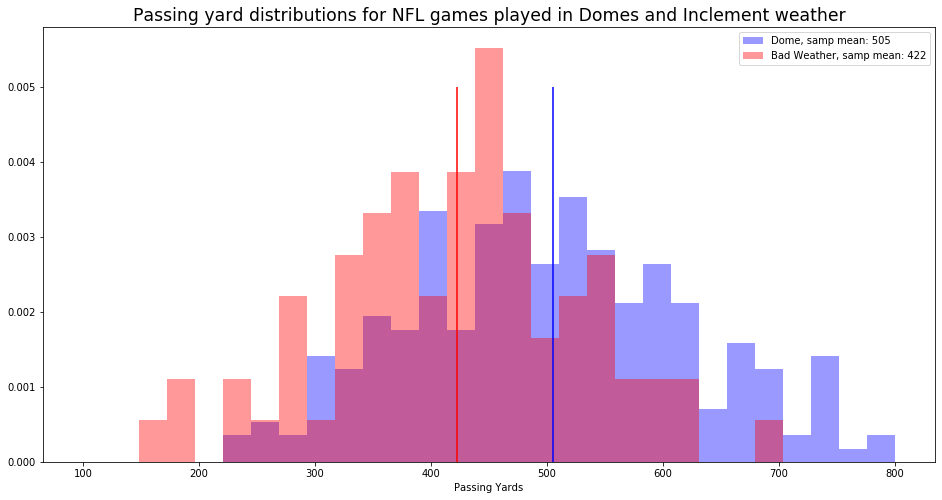

In [26]:

fig, ax = plt.subplots(1, figsize=(16, 8))
dome = dome_df['Total_Passing_Yards']
good = good_weather_df['Total_Passing_Yards']
bad = bad_weather_df['Total_Passing_Yards']

bins = np.linspace(100, 800, 30)


plt.hist(dome, bins, alpha=0.4, label='Dome, samp mean: 505', density=True, color='blue')
#plt.hist(good, bins, alpha=0.4, label='Good Weather', density=True, color='green')
plt.hist(bad, bins, alpha=0.4, label='Bad Weather, samp mean: 422', density=True, color='red')
plt.legend(loc='upper right')
plt.title("Passing yard distributions for NFL games played in Domes and Inclement weather", color='Black', size='xx-large')
plt.xlabel("Passing Yards")
#plt.vlines(470, 0, 0.005, color='green', label='good weather sample mean')
plt.vlines(505, 0, 0.005, color='blue', label='Dome sample mean')
plt.vlines(422, 0, 0.005, color='red', label='bad weather sample mean')
plt.savefig('dome v bad weather passing yard comparison.png')
plt.show()


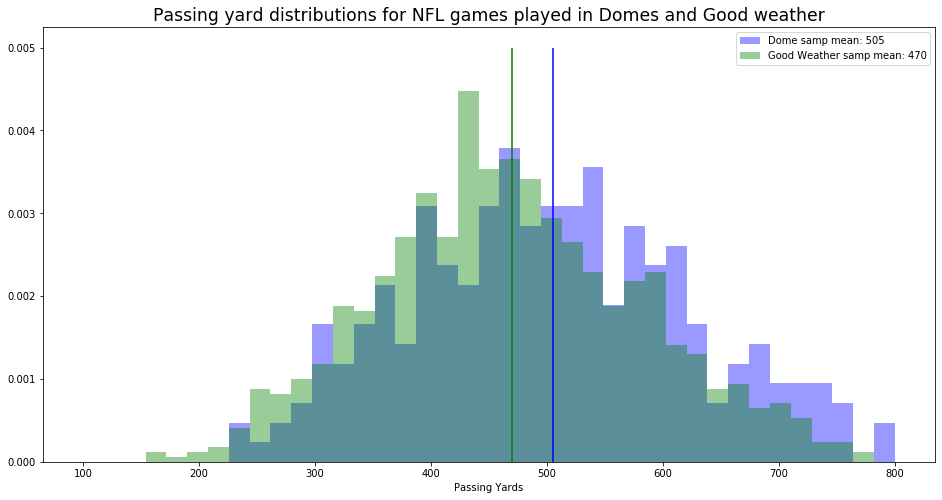

In [29]:
fig, ax = plt.subplots(1, figsize=(16, 8))
dome = dome_df['Total_Passing_Yards']
good = good_weather_df['Total_Passing_Yards']
bad = bad_weather_df['Total_Passing_Yards']

bins = np.linspace(100, 800, 40)


plt.hist(dome, bins, alpha=0.4, label='Dome samp mean: 505', density=True, color='blue')
plt.hist(good, bins, alpha=0.4, label='Good Weather samp mean: 470', density=True, color='green')
#plt.hist(bad, bins, alpha=0.4, label='Bad Weather', density=True, color='red')
plt.legend(loc='upper right')
plt.title("Passing yard distributions for NFL games played in Domes and Good weather", color='black', size='xx-large')
plt.xlabel("Passing Yards")
plt.vlines(470, 0, 0.005, color='green', label='good weather sample mean')
plt.vlines(505, 0, 0.005, color='blue', label='Dome sample mean')
plt.savefig("Domes and Good weather passing yard distributions.png")
plt.show()

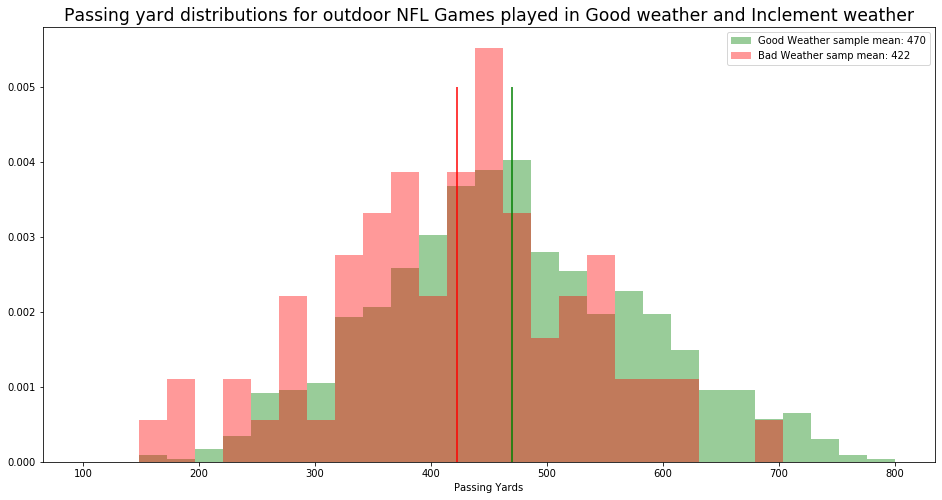

In [28]:
fig, ax = plt.subplots(1, figsize=(16, 8))
dome = dome_df['Total_Passing_Yards']
good = good_weather_df['Total_Passing_Yards']
bad = bad_weather_df['Total_Passing_Yards']

bins = np.linspace(100, 800, 30)


#plt.hist(dome, bins, alpha=0.4, label='Dome', density=True, color='blue')
plt.hist(good, bins, alpha=0.4, label='Good Weather sample mean: 470', density=True, color='green')
plt.hist(bad, bins, alpha=0.4, label='Bad Weather samp mean: 422', density=True, color='red')
plt.legend(loc='upper right')
plt.title("Passing yard distributions for outdoor NFL Games played in Good weather and Inclement weather", color='black', size='xx-large')
plt.xlabel("Passing Yards")
plt.vlines(470, 0, 0.005, color='green', label='good weather sample mean')
plt.vlines(422, 0, 0.005, color='red', label='bad weather sample mean')
plt.savefig("Passing yard distributions outdoor games good v bad weather")
plt.show()

In [31]:
stats.ttest_ind(dome_df['Total_Passing_Yards'],bad_weather_df['Total_Passing_Yards'], 
               equal_var=False)

Ttest_indResult(statistic=5.589313782574643, pvalue=1.1343400889170831e-07)

In [33]:
stats.ttest_ind(good_weather_df['Total_Passing_Yards'],bad_weather_df['Total_Passing_Yards'], 
               equal_var=False)

Ttest_indResult(statistic=3.6988622626104526, pvalue=0.00037641479198078373)

In [34]:
stats.ttest_ind(dome_df['Total_Passing_Yards'],good_weather_df['Total_Passing_Yards'], 
               equal_var=False)

Ttest_indResult(statistic=3.9128678206247214, pvalue=0.00010978895632510802)

In [48]:
dome_df.describe()

,index_x,home_passing_yards,Total_Passing_Yards,Away_passing_yards
count,238.000000,238.000000,238.000000,238.000000
mean,52.302521,263.924370,505.042017,241.117647
std,30.771666,78.537707,125.284378,78.563439
min,0.000000,82.000000,228.000000,37.000000
25%,24.750000,210.250000,413.000000,176.500000
50%,53.000000,263.500000,501.000000,234.000000
75%,81.000000,311.000000,589.000000,303.750000
max,103.000000,505.000000,849.000000,446.000000


In [49]:
good_weather_df.describe()

,index_x,home_passing_yards,Total_Passing_Yards,Away_passing_yards
count,951.000000,951.000000,951.000000,951.000000
mean,49.785489,238.049422,469.997897,231.948475
std,30.239226,76.288018,116.460158,77.041742
min,0.000000,20.000000,156.000000,41.000000
25%,24.000000,183.000000,390.000000,178.000000
50%,49.000000,235.000000,463.000000,231.000000
75%,76.000000,287.000000,546.000000,282.000000
max,103.000000,490.000000,866.000000,498.000000


In [50]:
bad_weather_df.describe()

,index_x,home_passing_yards,Total_Passing_Yards,Away_passing_yards
count,75.000000,75.000000,75.000000,75.000000
mean,58.226667,217.306667,421.613333,204.306667
std,30.787227,68.003373,108.460466,69.697798
min,1.000000,50.000000,156.000000,6.000000
25%,31.000000,180.000000,355.000000,156.500000
50%,66.000000,221.000000,428.000000,199.000000
75%,86.000000,254.000000,488.500000,244.500000
max,103.000000,406.000000,699.000000,401.000000
